In [1]:
import dmrghandler.energy_extrapolation as ee
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# fcidump.21_rc_{'Mo': 'def2-SVP', 'I': 'def2-SVP', 'Cl': 'def2-SVP', 'default': '6-311+G(d,p)'}
# Read CSV file
data = np.genfromtxt('hami_21_data.csv', delimiter=',', skip_header=1)
loop_indices = data[:, 0]
dmrg_energies = data[:, 1]
bond_dimensions = data[:, 2]
discarded_weights = data[:, 3]

In [3]:
print('Loop indices:', loop_indices)
print('DMRG energies:', dmrg_energies)
print('Bond dimensions:', bond_dimensions)
print('Discarded weights:', discarded_weights)

Loop indices: [-1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 40. 41. 42. 43. 44.]
DMRG energies: [-5411.9167423  -5411.54444653 -5411.92117229 -5411.5842417
 -5411.9473919  -5411.9255563  -5411.94901958 -5411.96787272
 -5411.96441168 -5411.98294064 -5411.98468518 -5412.00269382
 -5412.01313454 -5412.01164167 -5412.02761397 -5412.02575393
 -5412.039921   -5412.04406872 -5412.05283962 -5412.05497823
 -5412.06040493 -5412.06461318 -5412.06663267 -5412.06697791
 -5412.0679487  -5412.06985235 -5412.07088415 -5412.0715905
 -5412.07293163 -5412.0735119  -5412.07464904 -5412.07442345
 -5412.07568496 -5412.07664158 -5412.07742559 -5412.07802803
 -5412.07878493 -5412.07951669 -5412.08021107 -5412.0807007
 -5412.0812403  -5412.08165483 -5412.08227996 -5412.08290832
 -5412.08339129 -5412.08390661]
Bond dimensions: [  5.   6.   7.   8.   9.  10.  11.  13.  15.  17.  19.  21.  24. 

In [4]:
# Sort data based on bond dimension
sorted_indices = np.argsort(bond_dimensions)
sorted_bond_dimensions = bond_dimensions[sorted_indices]
sorted_dmrg_energies = dmrg_energies[sorted_indices]
sorted_discarded_weights = discarded_weights[sorted_indices]


Number of kept bond dimensions: 10
Kept bond dimensions: [245. 270. 297. 327. 360. 397. 437. 481. 530. 583.]
Kept DMRG energies: [-5412.07878493 -5412.07951669 -5412.08021107 -5412.0807007
 -5412.0812403  -5412.08165483 -5412.08227996 -5412.08290832
 -5412.08339129 -5412.08390661]
Kept discarded weights: [6.03765358e-05 5.99396830e-05 5.87790768e-05 4.85747080e-05
 4.59134643e-05 3.94969101e-05 3.72198928e-05 3.36348388e-05
 3.07637178e-05 2.90776008e-05]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.0481e+00                                    3.90e+02    
       1              3         5.4287e-03      1.04e+00       2.89e+00       5.40e+01    
       2              4         8.1538e-04      4.61e-03       2.18e+00       1.55e+01    
       3              5         5.3586e-04      2.80e-04       9.57e-01       1.27e+01    
       4              6         5.3586e-04      0.00e+00       0.00e+00       1.27e+0

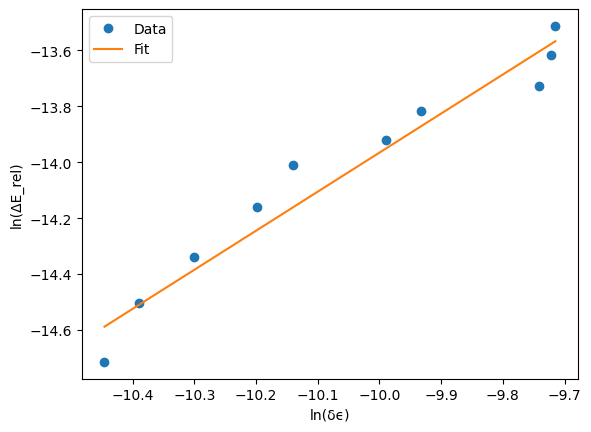

In [9]:
# num_keep = len(sorted_bond_dimensions)
num_keep = 10

kept_bond_dimensions = sorted_bond_dimensions[-num_keep:]
kept_dmrg_energies = sorted_dmrg_energies[-num_keep:]
kept_discarded_weights = sorted_discarded_weights[-num_keep:]

print('Number of kept bond dimensions:', num_keep)
print('Kept bond dimensions:', kept_bond_dimensions)
print('Kept DMRG energies:', kept_dmrg_energies)
print('Kept discarded weights:', kept_discarded_weights)

(result_obj, energy_estimated, fit_parameters, R_squared) = ee.dmrg_energy_extrapolation(
    energies_dmrg=kept_dmrg_energies,
    independent_vars=kept_discarded_weights,
    extrapolation_type= "discarded_weight",
    past_parameters = None,
    verbosity=2,
)

print('Energy estimated:', energy_estimated)
print('DMRG Energy:', np.min(kept_dmrg_energies))
print('Fit parameters:', fit_parameters)
print('R squared:', R_squared)

# Plot
plt.figure()
ln_weights = np.log(kept_discarded_weights)
rel_energy = (kept_dmrg_energies - energy_estimated)/energy_estimated
ln_abs_rel_energy = np.log(np.abs(rel_energy))
plt.plot(ln_weights, ln_abs_rel_energy, 'o', label='Data')
# ln ΔE_rel =a+b ln(δϵ)
# alpha = fit_parameters[0]
# a =np.log(alpha)
a = fit_parameters[0]
b = fit_parameters[1]

predicted_rel_energy = a + b * ln_weights
# print('alpha:', alpha)
print('a:', a)
print('b:', b)
print('Predicted relative energy:', predicted_rel_energy)
plt.plot(ln_weights, predicted_rel_energy, label='Fit')

# ee.plot_extrapolation(discarded_weights=kept_discarded_weights,
#     energies_dmrg=kept_dmrg_energies,
#     fit_parameters=fit_parameters,
#     bond_dims=kept_bond_dimensions,
#     plot_filename = None,
#     figNum = 0,
# )
plt.xlabel('ln(δϵ)')
plt.ylabel('ln(ΔE_rel)')
plt.legend()
plt.show()

